# **Saham ACE Predictive Analytics**

Download dataset from kaggle

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d muamkh/ihsgstockdata
!unzip ihsgstockdata.zip

ihsgstockdata.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ihsgstockdata.zip
replace DaftarSaham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Import required library**

In [ ]:
import seaborn as sns 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/daily/ACES.csv')
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.set_index('timestamp')
print(f"Jumlah Baris = {df.shape[0]}")
df.head()

Jumlah Baris = 3959


,open,low,high,close,volume
timestamp,,,,,
2007-11-06,98,89,102,98,1274430000
2007-11-07,98,97,103,101,349330000
2007-11-08,99,96,100,99,66270000
2007-11-09,95,95,97,95,40075000
2007-11-12,90,89,95,90,113285000


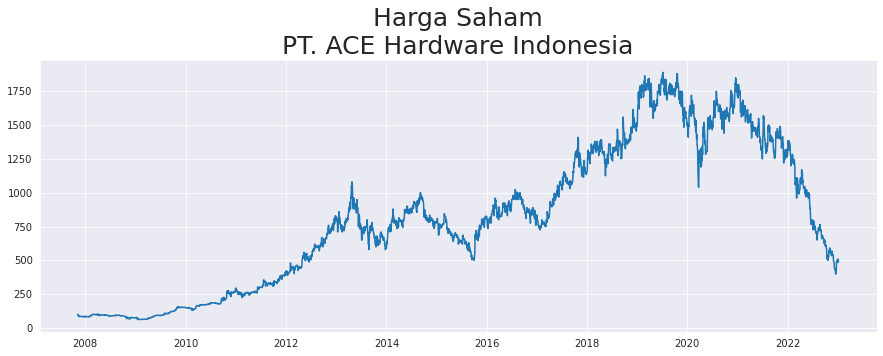

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df.index, df['close'])
plt.title("Harga Saham\nPT. ACE Hardware Indonesia", fontsize=25)
plt.show()

## Exploratory Data Analysis
**Deskripsi Variabel**
* Timestamp : Tanggal pencatatan data
* Open : harga ketika dibuka yang dihitung perhari
* Close : harga ketika ditutup yang dihitung perhari
* Low : harga terendah perhari
* High : harga tertinggi perhari
* Volume : volume transaksi perhari

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3959 entries, 2007-11-06 to 2023-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   open    3959 non-null   int64
 1   low     3959 non-null   int64
 2   high    3959 non-null   int64
 3   close   3959 non-null   int64
 4   volume  3959 non-null   int64
dtypes: int64(5)
memory usage: 185.6 KB


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom. 
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.

In [ ]:
df.drop(['volume'],axis=1,inplace=True)
df.describe()

,open,low,high,close
count,3959.000000,3959.000000,3959.000000,3959.000000
mean,815.531700,800.985350,828.456681,814.415256
std,523.899537,514.263808,531.840904,522.894076
min,63.000000,61.000000,63.000000,63.000000
25%,326.000000,320.000000,328.500000,326.000000
50%,785.000000,770.000000,800.000000,780.000000
75%,1280.000000,1255.000000,1300.000000,1280.000000
max,1905.000000,1860.000000,1920.000000,1890.000000


In [ ]:
df.isnull().sum()

open     0
low      0
high     0
close    0
dtype: int64

Dari hasil analisa diatas, tidak terdapat Missing Value pada setiap variabel

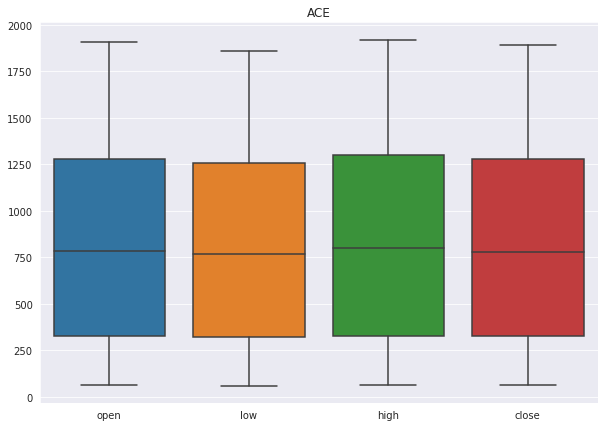

In [ ]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("ACE")
plt.show()

Jika dilihat dari plot diatas tidak terdapat Outlier pada setiap variabel yang dipilih

### Univariate Analysis

Karena tidak terdapat Categorical Features, maka kita dapat langsung menganalisis Numerical Features pada dataset dengan menampilkan plot dan grafik histogramnya

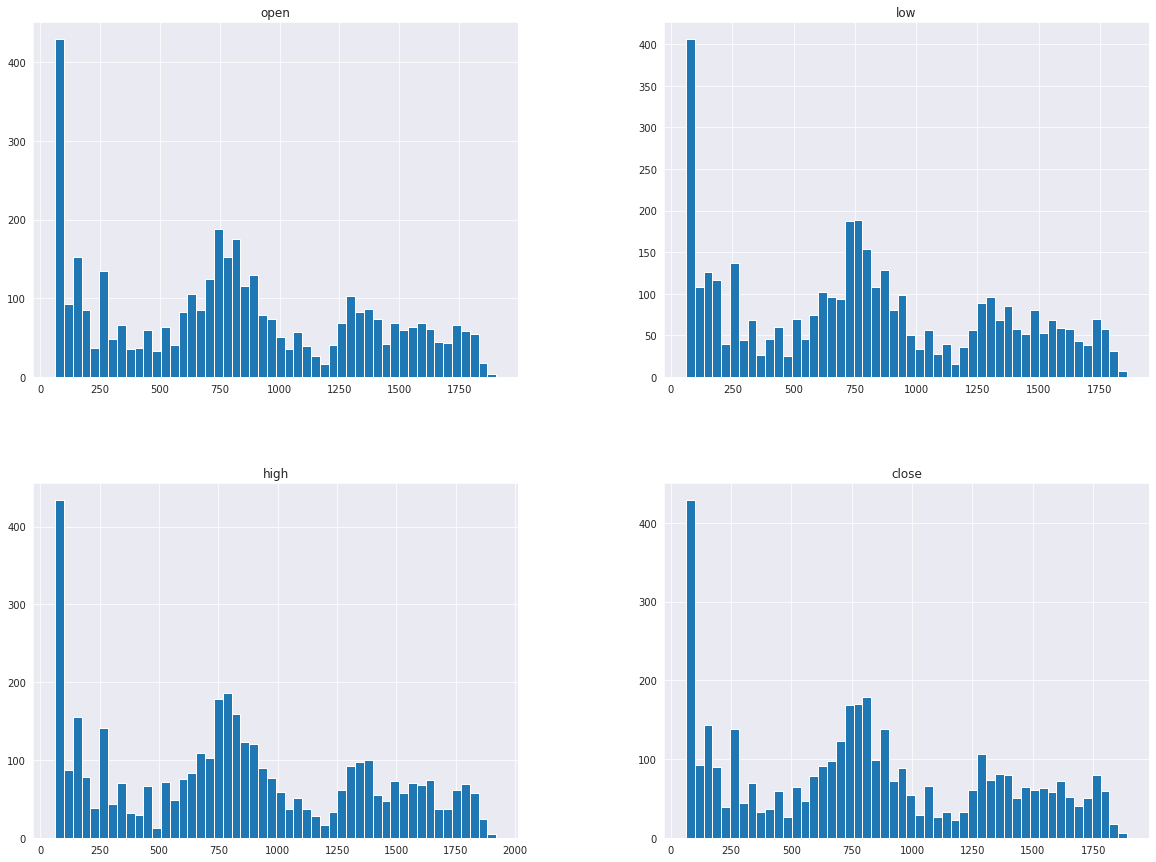

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil histogram diatas dapat disimpulkan bahwasannya hampir semua variabel Distribusi nilainya miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model nantinya.

### Multivariate Analysis

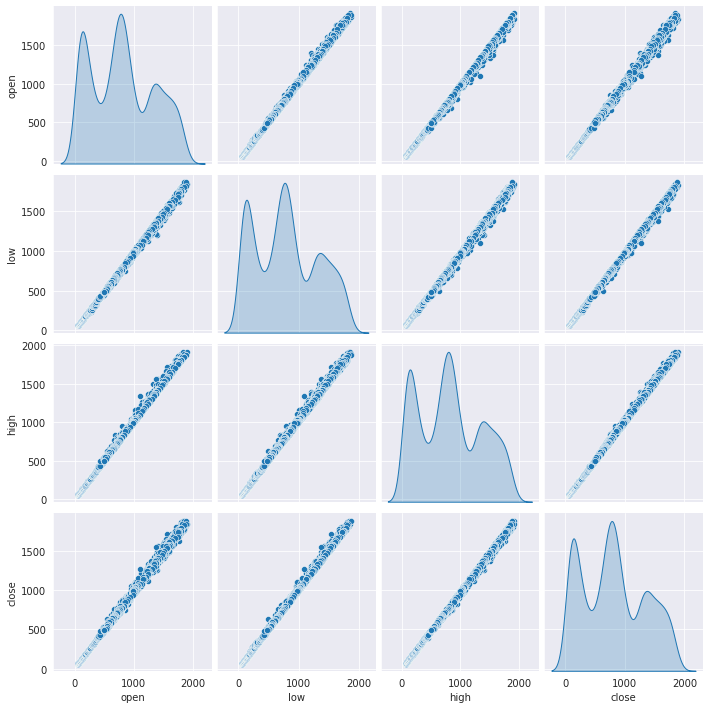

In [ ]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

Korelasi yang terjadi kebanyakan bernilai positif karena kebanyakan grafik pada sumbu y dan x mengalami peningkatan yang cukup signifikan membentuk sebuah garis

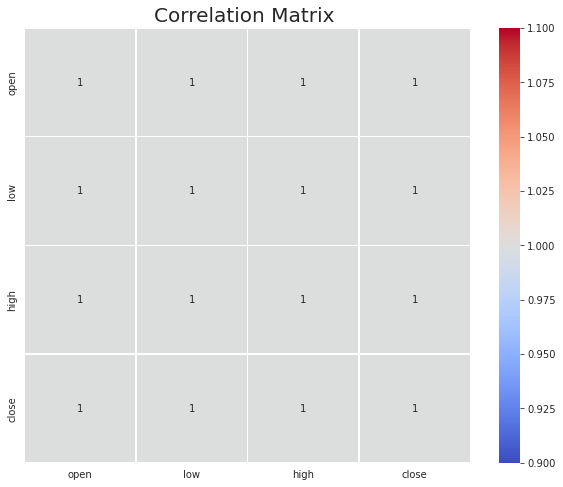

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)
plt.show()

terlihat bahwa pada matriks korelasi diatas dapat disimpulkan bahwasannya semua variabel memiliki keterikatan dan korelasi yang kuat antar variabel lainnya, dimana nilai korelasi antar variabel bernilai 1.

## Data Preparation

### Train Test Split
Membagi data latih dan data test

In [ ]:
X = df.drop("close",axis=1)
y = df.close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023,shuffle=False)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3959
Total # of sample in train dataset: 3167
Total # of sample in test dataset: 792


Melakukan standarisasi/normalisasi data 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Development

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

**Random Forest**




In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=64, max_depth=16, random_state=2023, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=64, n_jobs=-1,
                      random_state=2023)

**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=2023)                             
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=2023)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

## Evaluasi Model

Mengukur nilai MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting','LR'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'LR': LR}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.086577,0.319177
RF,0.020277,0.334936
Boosting,2.238564,7.798675
LR,0.095724,0.228652


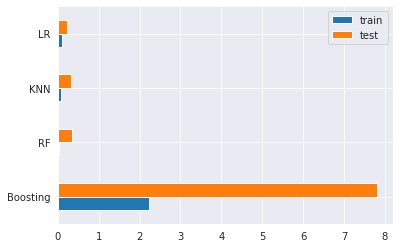

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Linear Regression (LR) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi.

### Menghitung akurasi model

In [ ]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100
lr_accuracy = LR.score(X_test, y_test)*100

In [ ]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy],
            [lr_accuracy],]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting', 'Linear Regression'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,99.761589
Random Forest,99.749817
Boosting,94.174727
Linear Regression,99.829207


## Predict

In [ ]:
prediksi = X_test.copy()
pred_dict = {'y_true':y_test}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_LR
timestamp,,,,,
2019-12-26,1550,1551.9,1552.2,1714.3,1550.9
2019-12-27,1550,1541.2,1548.7,1712.3,1544.1
2019-12-30,1495,1512.5,1518.5,1354.9,1516.4
2019-12-31,1495,1512.5,1518.5,1354.9,1516.4
2020-01-01,1495,1512.5,1518.5,1354.9,1516.4
...,...,...,...,...,...
2023-01-02,510,502.8,501.0,464.4,505.1
2023-01-03,510,522.5,523.0,551.6,536.1
2023-01-04,500,518.1,522.2,467.1,508.8


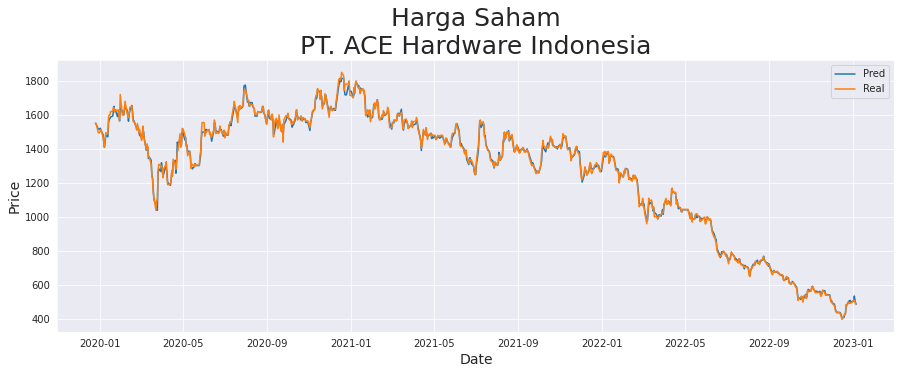

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(y_test.index, LR.predict(X_test), label='Pred')
plt.plot(y_test.index, y_test, label='Real')
plt.legend(loc='upper right')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title("Harga Saham\nPT. ACE Hardware Indonesia", fontsize=25)
plt.show()